## 자전거 대여 수요 예측

### Project Overview
- 난이도 : *
- 경진대회명 : 자전거 대여 수요 예측 경진대회
- 목표 : 날짜, 계절, 근무일 여부, 날씨, 온도, 체감 온도, 풍속 데이터를 활용하여 자전거 대여 수량 예측
- 문제 유형 : 회귀
- 평가지표 : RMSLE
- 제출 시 사용 모델 : Random Forest Regression
- 사용 라이브러리 및 버전
    - numpy==1.19.5
    - pandas==1.3.2
    - seaborn==0.11.2
    - matplotlib==3.4.3
    - scikit-learn==0.23.2
    - datetime, calendar

### 학습 목표
- 머신러닝 모델링 프로세스와 기본적인 회귀 모델을 배움

### EDA

In [ ]:
import numpy as np
import pandas as pd

data_path='/kaggle/input/bike-sharing-demand/'

train = pd.read_csv(data_path+'train.csv')
test = pd.read_csv(data_path+'test.csv')
submission = pd.read_csv(data_path+'sampleSubmission.csv')

In [ ]:
train.shape, test.shape

((10886, 12), (6493, 9))

In [ ]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [ ]:
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


In [ ]:
print(train['datetime'][100])
print(train['datetime'][100].split())
print(train['datetime'][100].split()[0])
print(train['datetime'][100].split()[1])
print(train['datetime'][100].split()[0])

2011-01-05 09:00:00
['2011-01-05', '09:00:00']
2011-01-05
09:00:00
2011-01-05


In [ ]:
print(train['datetime'][100].split()[0])
print(train['datetime'][100].split()[0].split('-'))
print(train['datetime'][100].split()[0].split('-')[0])
print(train['datetime'][100].split()[0].split('-')[1])
print(train['datetime'][100].split()[0].split('-')[2])

2011-01-05
['2011', '01', '05']
2011
01
05


In [ ]:
print(train['datetime'][100].split()[1])
print(train['datetime'][100].split()[1].split(':'))
print(train['datetime'][100].split()[1].split(':')[0])
print(train['datetime'][100].split()[1].split(':')[1])
print(train['datetime'][100].split()[1].split(':')[2])

09:00:00
['09', '00', '00']
09
00
00


In [ ]:
train['date'] = train['datetime'].apply(lambda x: x.split()[0])

train['year'] = train['datetime'].apply(lambda x : x.split()[0].split('-')[0])
train['month'] = train['datetime'].apply(lambda x : x.split()[0].split('-')[1])
train['day'] = train['datetime'].apply(lambda x : x.split()[0].split('-')[2])
train['hour'] = train['datetime'].apply(lambda x : x.split()[1].split(':')[0])
train['minute'] = train['datetime'].apply(lambda x : x.split()[1].split(':')[1])
train['second'] = train['datetime'].apply(lambda x : x.split()[1].split(':')[2])

In [ ]:
from datetime import datetime
import calendar

print(train['date'][100])
print(datetime.strptime(train['date'][100], '%Y-%m-%d'))
print(datetime.strptime(train['date'][100], '%Y-%m-%d').weekday())
print(calendar.day_name[datetime.strptime(train['date'][100], '%Y-%m-%d').weekday()])

2011-01-05
2011-01-05 00:00:00
2
Wednesday


In [ ]:
train['weekday'] = train['date'].apply(lambda dateString : 
                                      calendar.day_name[datetime.strptime(dateString, '%Y-%m-%d').weekday()])

In [ ]:
train['season'] = train['season'].map({1:'Spring',
                                       2: 'Summer',
                                       3: 'Fall',
                                       4: 'Winter'})
train['weather'] = train['weather'].map({1: 'Clear',
                                         2: 'Mist, Few clouds',
                                         3: 'Light Snow, Rain, Thunderstorm',
                                         4: 'Heavy Rain, Thunderstorm, Snow, Fog'})

In [ ]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year,month,day,hour,minute,second,weekday
0,2011-01-01 00:00:00,Spring,0,0,Clear,9.84,14.395,81,0.0,3,13,16,2011-01-01,2011,01,01,00,00,00,Saturday
1,2011-01-01 01:00:00,Spring,0,0,Clear,9.02,13.635,80,0.0,8,32,40,2011-01-01,2011,01,01,01,00,00,Saturday
2,2011-01-01 02:00:00,Spring,0,0,Clear,9.02,13.635,80,0.0,5,27,32,2011-01-01,2011,01,01,02,00,00,Saturday
3,2011-01-01 03:00:00,Spring,0,0,Clear,9.84,14.395,75,0.0,3,10,13,2011-01-01,2011,01,01,03,00,00,Saturday
4,2011-01-01 04:00:00,Spring,0,0,Clear,9.84,14.395,75,0.0,0,1,1,2011-01-01,2011,01,01,04,00,00,Saturday


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
# Display graphs
#%matplotlib inline

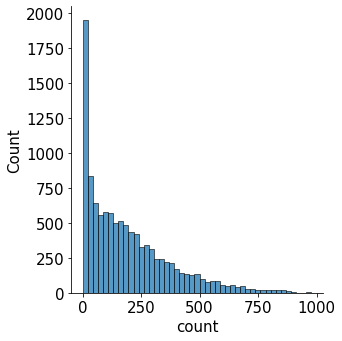

In [ ]:
mpl.rc('font', size=15)
sns.displot(train['count'])

# Visualized graph doesn't follow normal distribution -> Can't expect high performance -> use "log transformation"
# Log transformation : use when distribution is positively skewed
# Need to transform back using Exponential transformation at last

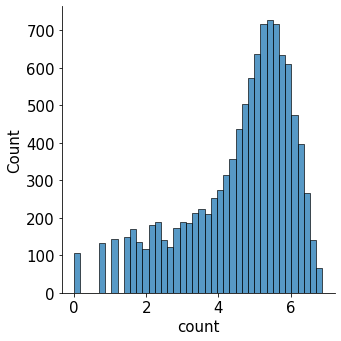

In [ ]:
sns.displot(np.log(train['count']))

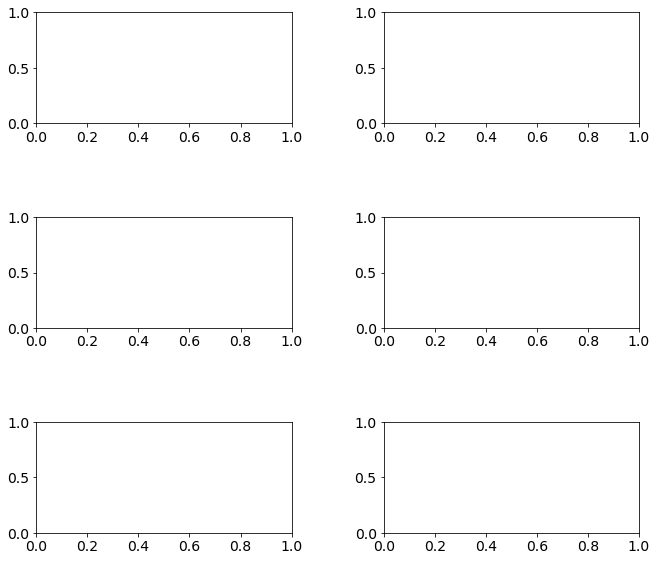

In [ ]:
mpl.rc('font', size=14)
mpl.rc('axes', titlesize=15)
figure, axes = plt.subplots(nrows=3, ncols=2)
plt.tight_layout()
figure.set_size_inches(10, 9)

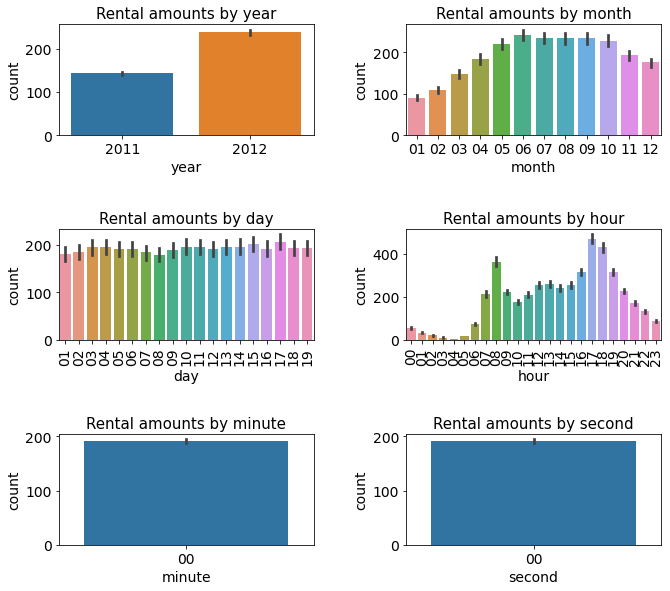

In [ ]:
mpl.rc('font', size=14)
mpl.rc('axes', titlesize=15)
figure, axes = plt.subplots(nrows=3, ncols=2)
plt.tight_layout()
figure.set_size_inches(10, 9)

sns.barplot(data=train, x='year', y='count', ax=axes[0,0])
sns.barplot(data=train, x='month', y='count', ax=axes[0,1])
sns.barplot(data=train, x='day', y='count', ax=axes[1,0])
sns.barplot(data=train, x='hour', y='count', ax=axes[1,1])
sns.barplot(data=train, x='minute', y='count', ax=axes[2,0])
sns.barplot(data=train, x='second', y='count', ax=axes[2,1])

axes[0,0].set(title='Rental amounts by year')
axes[0,1].set(title='Rental amounts by month')
axes[1,0].set(title='Rental amounts by day')
axes[1,1].set(title='Rental amounts by hour')
axes[2,0].set(title='Rental amounts by minute')
axes[2,1].set(title='Rental amounts by second')

axes[1,0].tick_params(axis='x', labelrotation=90)
axes[1,1].tick_params(axis='x', labelrotation=90)

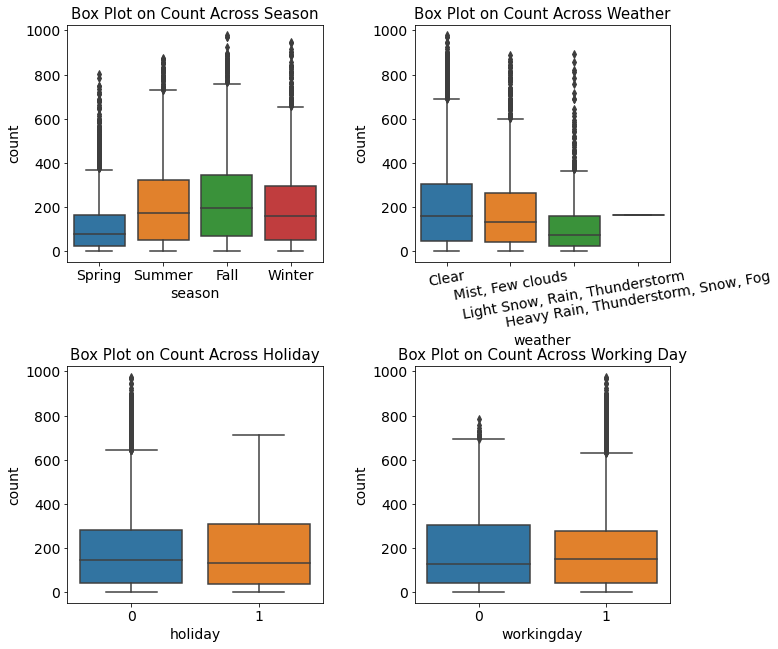

In [ ]:
figure, axes = plt.subplots(nrows=2, ncols=2)
plt.tight_layout()
figure.set_size_inches(10, 10)

sns.boxplot(data=train, x='season', y='count', ax=axes[0,0])
sns.boxplot(data=train, x='weather', y='count', ax=axes[0,1])
sns.boxplot(data=train, x='holiday', y='count', ax=axes[1,0])
sns.boxplot(data=train, x='workingday', y='count', ax=axes[1,1])

axes[0,0].set(title='Box Plot on Count Across Season')
axes[0,1].set(title='Box Plot on Count Across Weather')
axes[1,0].set(title='Box Plot on Count Across Holiday')
axes[1,1].set(title='Box Plot on Count Across Working Day')

axes[0,1].tick_params(axis='x', labelrotation=10)

<AxesSubplot:xlabel='hour', ylabel='count'>

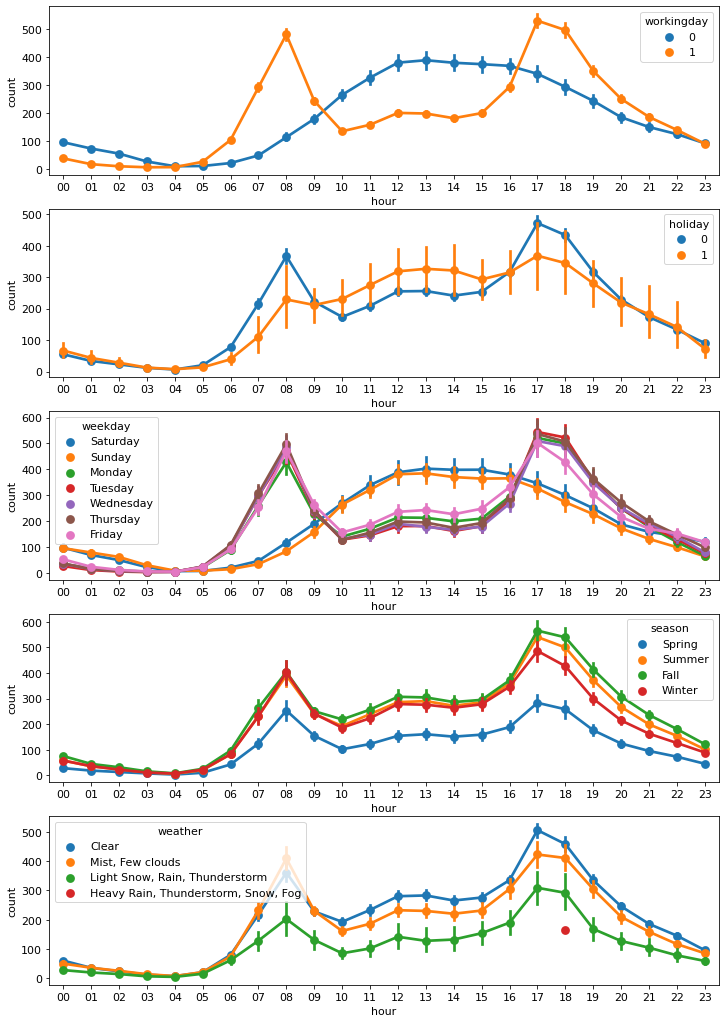

In [ ]:
mpl.rc('font', size=11)
figure, axes = plt.subplots(nrows=5)
figure.set_size_inches(12, 18)

sns.pointplot(data=train, x='hour', y='count', hue='workingday', ax=axes[0])
sns.pointplot(data=train, x='hour', y='count', hue='holiday', ax=axes[1])
sns.pointplot(data=train, x='hour', y='count', hue='weekday', ax=axes[2])
sns.pointplot(data=train, x='hour', y='count', hue='season', ax=axes[3])
sns.pointplot(data=train, x='hour', y='count', hue='weather', ax=axes[4])

<AxesSubplot:xlabel='humidity', ylabel='count'>

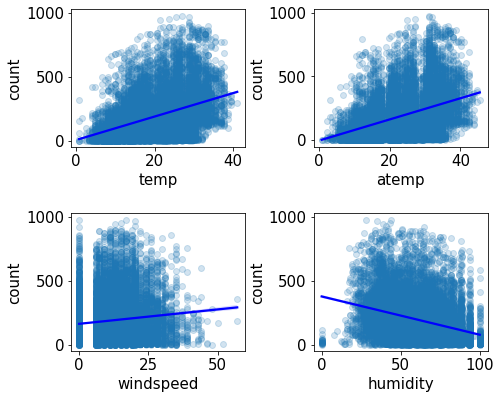

In [ ]:
mpl.rc('font', size=15)
figure, axes = plt.subplots(nrows=2, ncols=2)
plt.tight_layout()
figure.set_size_inches(7, 6)

sns.regplot(data=train, x='temp', y='count', ax=axes[0, 0], scatter_kws={'alpha':0.2}, line_kws={'color':'blue'})
sns.regplot(data=train, x='atemp', y='count', ax=axes[0, 1], scatter_kws={'alpha':0.2}, line_kws={'color':'blue'})
sns.regplot(data=train, x='windspeed', y='count', ax=axes[1, 0], scatter_kws={'alpha':0.2}, line_kws={'color':'blue'})
sns.regplot(data=train, x='humidity', y='count', ax=axes[1, 1], scatter_kws={'alpha':0.2}, line_kws={'color':'blue'})

In [ ]:
train[['temp', 'atemp', 'humidity', 'windspeed','count']].corr()

,temp,atemp,humidity,windspeed,count
temp,1.000000,0.984948,-0.064949,-0.017852,0.394454
atemp,0.984948,1.000000,-0.043536,-0.057473,0.389784
humidity,-0.064949,-0.043536,1.000000,-0.318607,-0.317371
windspeed,-0.017852,-0.057473,-0.318607,1.000000,0.101369
count,0.394454,0.389784,-0.317371,0.101369,1.000000


[Text(0.5, 1.0, 'Heatmap of Numerical Data')]

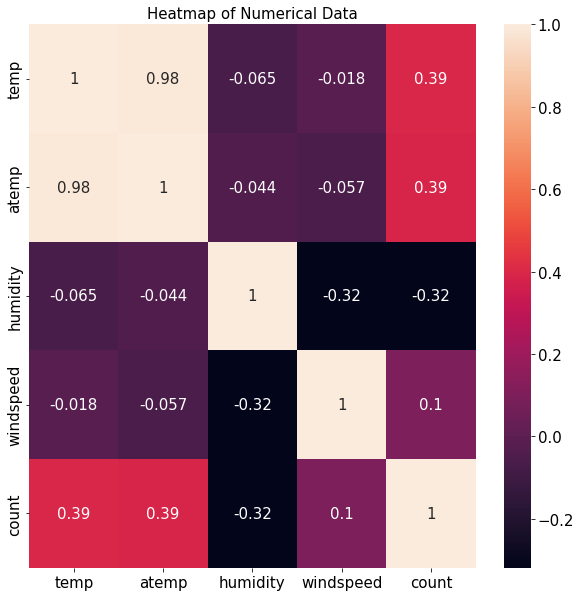

In [ ]:
corrMat = train[['temp', 'atemp', 'humidity', 'windspeed','count']].corr()
fig, ax = plt.subplots()
fig.set_size_inches(10, 10)
sns.heatmap(corrMat, annot=True)
ax.set(title='Heatmap of Numerical Data')

### Training & Subission (Random Forest)

In [ ]:
import pandas as pd

data_path='/kaggle/input/bike-sharing-demand/'

train = pd.read_csv(data_path+'train.csv')
test = pd.read_csv(data_path+'test.csv')
submission = pd.read_csv(data_path+'sampleSubmission.csv')

In [ ]:
train = train[train['weather'] != 4]

In [ ]:
all_data = pd.concat([train, test], ignore_index=True)
all_data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3.0,13.0,16.0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8.0,32.0,40.0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5.0,27.0,32.0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3.0,10.0,13.0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
17373,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN
17374,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN
17375,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,NaN,NaN,NaN
17376,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981,NaN,NaN,NaN


In [ ]:
from datetime import datetime

all_data['date'] = all_data['datetime'].apply(lambda x : x.split()[0])
all_data['year'] = all_data['datetime'].apply(lambda x : x.split()[0].split('-')[0])
all_data['month'] = all_data['datetime'].apply(lambda x: x.split()[0].split('-')[1])
all_data['hour'] = all_data['datetime'].apply(lambda x: x.split()[1].split(':')[0])
all_data['weekday'] = all_data['date'].apply(lambda dateString: datetime.strptime(dateString, '%Y-%m-%d').weekday())

In [ ]:
all_data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year,month,hour,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3.0,13.0,16.0,2011-01-01,2011,01,00,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8.0,32.0,40.0,2011-01-01,2011,01,01,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5.0,27.0,32.0,2011-01-01,2011,01,02,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3.0,10.0,13.0,2011-01-01,2011,01,03,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0.0,1.0,1.0,2011-01-01,2011,01,04,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17373,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN,2012-12-31,2012,12,19,0
17374,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN,2012-12-31,2012,12,20,0
17375,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,NaN,NaN,NaN,2012-12-31,2012,12,21,0
17376,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981,NaN,NaN,NaN,2012-12-31,2012,12,22,0


In [ ]:
drop_features = ['casual', 'registered', 'datetime', 'date', 'month', 'windspeed']
all_data = all_data.drop(drop_features, axis=1)

In [ ]:
all_data

,season,holiday,workingday,weather,temp,atemp,humidity,count,year,hour,weekday
0,1,0,0,1,9.84,14.395,81,16.0,2011,00,5
1,1,0,0,1,9.02,13.635,80,40.0,2011,01,5
2,1,0,0,1,9.02,13.635,80,32.0,2011,02,5
3,1,0,0,1,9.84,14.395,75,13.0,2011,03,5
4,1,0,0,1,9.84,14.395,75,1.0,2011,04,5
...,...,...,...,...,...,...,...,...,...,...,...
17373,1,0,1,2,10.66,12.880,60,NaN,2012,19,0
17374,1,0,1,2,10.66,12.880,60,NaN,2012,20,0
17375,1,0,1,1,10.66,12.880,60,NaN,2012,21,0
17376,1,0,1,1,10.66,13.635,56,NaN,2012,22,0


In [ ]:
X_train = all_data[~pd.isnull(all_data['count'])]
X_test = all_data[pd.isnull(all_data['count'])]

X_train = X_train.drop(['count'], axis=1)
X_test = X_test.drop(['count'], axis=1)

y = train['count']

In [ ]:
X_train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,year,hour,weekday
0,1,0,0,1,9.84,14.395,81,2011,00,5
1,1,0,0,1,9.02,13.635,80,2011,01,5
2,1,0,0,1,9.02,13.635,80,2011,02,5
3,1,0,0,1,9.84,14.395,75,2011,03,5
4,1,0,0,1,9.84,14.395,75,2011,04,5


In [ ]:
import numpy as np

def rmsle(y_true, y_pred, convertExp=True) :
    if convertExp:
        y_true = np.exp(y_true)
        y_pred = np.exp(y_pred)
    
    log_true = np.nan_to_num(np.log(y_true+1))
    log_pred = np.nan_to_num(np.log(y_pred+1))
    
    output = np.sqrt(np.mean(log_true-log_pred)**2)
    return output

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

randomforest_model = RandomForestRegressor()

rf_params = {'random_state':[42],'n_estimators':[100, 120, 140]}

rmsle_scorer = metrics.make_scorer(rmsle, greater_is_better=False)

gridsearch_rf_model = GridSearchCV(estimator=randomforest_model, 
                                     param_grid=rf_params,
                                     scoring=rmsle_scorer,
                                     cv=5)

log_y = np.log(y)
gridsearch_rf_model.fit(X_train, log_y)

print(f'Best hyperparameter : {gridsearch_rf_model.best_params_}')

preds = gridsearch_rf_model.best_estimator_.predict(X_train)

Best hyperparameter : {'n_estimators': 120, 'random_state': 42}


Text(0.5, 1.0, 'Predicted Test Data Distribution')

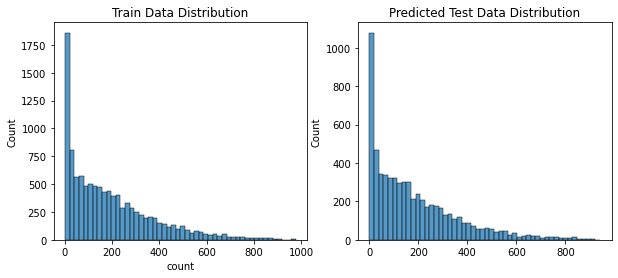

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

randomforest_preds = gridsearch_rf_model.best_estimator_.predict(X_test)

figure, axes = plt.subplots(ncols=2)
figure.set_size_inches(10, 4)

sns.histplot(y, bins=50, ax=axes[0])
axes[0].set_title('Train Data Distribution')
sns.histplot(np.exp(randomforest_preds), bins=50, ax=axes[1])
axes[1].set_title('Predicted Test Data Distribution')

In [ ]:
submission['count'] = np.exp(randomforest_preds)
submission.to_csv('submission.csv', index=False)